<a href="https://colab.research.google.com/github/YinYinTan/CIND820FinalProject/blob/main/4_Random_Forest_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification Models

In [ ]:
#Read file
df = pd.read_csv('3a. Working Dataset.csv', index_col=None)

# All Features

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1).values
y = df['Worse_MH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#Random forest classification model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [ ]:
#Evaluation of random forest classification model
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.7323903002309469
Precision: 0.852245292129406
Recall: 0.739731768650461
F1-score: 0.7920125645052727
Area Under Curve (AUC): 0.7279363852528743


# Random Forest Classifier - Selected Features (Filter Method)

In [ ]:
#Identify top 20 features
feature_names = df.drop(['Worse_MH'],axis=1).columns

feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp = feature_imp[:20]

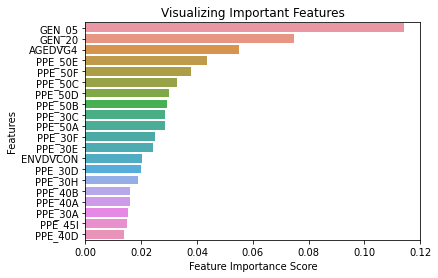

In [ ]:
#Plot top 15 features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Based on the bar graph above, it was decided to build a random forest model using only the top 5 features

In [ ]:
#Obtain names of top 5 variables
top_five = feature_imp[:5].index
top_five

Index(['GEN_05', 'GEN_20', 'AGEDVG4', 'PPE_50E', 'PPE_50F'], dtype='object')

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

#Only select top 5 variables for X
X = df.loc[:,top_five].values
y = df['Worse_MH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#Evaluation of random forest classification model
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))

In [ ]:
#Random forest classification model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

# Random Forest Classifier - Selected Features using Backward Elimination (Wrapper Method)

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(random_state=888)

rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

model = RandomForestClassifier(random_state=888)

sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction="forward", cv=10)
sfs.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=10,
           forward=False,
           floating=False,
           verbose=2,
           scoring='precision',
           cv=5)

features = feature_selector.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

"\n           k_features=10, \n           scoring='r2',\n           cv=3)\n           "

In [ ]:
filtered_features = train_features.columns[list(features.k_feature_idx_)]
filtered_features